<a href="https://colab.research.google.com/github/btg1631/study_data_analytics/blob/main/docs/quests/DDA/SpineSurgeryList_datetime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 한글 폰트 설치 및 시각화

In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Reuntime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [216]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

### 입원 일자

In [217]:
import pandas as pd

In [218]:
df_spinesurgery = pd.read_csv('SpineSurgeryList.csv')
df_spinesurgery[:3]

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.0,4,Down,0


In [219]:
df_spinesurgery['입원일자'].value_counts()

20190129    23
20190101    13
20190227    12
20190130    12
20190330    12
            ..
20141105     1
20090702     1
20090712     1
20090524     1
20170412     1
Name: 입원일자, Length: 1051, dtype: int64

In [220]:
df_spinesurgery['퇴원일자'].value_counts()

20120229    46
20190201    23
20190301    20
20190103    19
20190131    15
            ..
20110603     1
20170713     1
20100911     1
20100914     1
20170413     1
Name: 퇴원일자, Length: 1012, dtype: int64

In [221]:
df_spinesurgery['입원일자_datetime'] = pd.to_datetime(df_spinesurgery['입원일자'], format='%Y%m%d')
df_spinesurgery['퇴원일자_datetime'] = pd.to_datetime(df_spinesurgery['퇴원일자'], format='%Y%m%d')

In [222]:
df_spinesurgery.describe(include=['datetime'], datetime_is_numeric=True)

,입원일자_datetime,퇴원일자_datetime
count,1894,1894
mean,2016-05-29 16:20:46.884899584,2016-05-20 19:11:50.876452096
min,2009-01-20 00:00:00,2009-01-24 00:00:00
25%,2012-11-05 06:00:00,2012-10-12 12:00:00
50%,2018-12-31 00:00:00,2019-01-03 00:00:00
75%,2019-06-23 00:00:00,2019-06-25 00:00:00
max,2020-08-04 00:00:00,2020-08-07 00:00:00


In [223]:
df_spinesurgery['입원기간_result'] = df_spinesurgery['퇴원일자_datetime'] - df_spinesurgery['입원일자_datetime']
df_spinesurgery['입원기간_result']

0      3 days
1      1 days
2      3 days
3      3 days
4      4 days
        ...  
1889   1 days
1890   3 days
1891   2 days
1892   3 days
1893   1 days
Name: 입원기간_result, Length: 1894, dtype: timedelta64[ns]

In [224]:
df_spinesurgery['입원기간_result'].value_counts()

2 days        620
1 days        463
3 days        384
4 days        214
0 days         47
             ... 
177 days        1
-43 days        1
-730 days       1
-2116 days      1
71 days         1
Name: 입원기간_result, Length: 75, dtype: int64

In [245]:
df_spinesurgery_sorted = df_spinesurgery.sort_values(by='입원기간_result').iloc[-5:][['입원기간_result','환자ID']]
df_spinesurgery_sorted['입원기간_result'] = df_spinesurgery_sorted['입원기간_result'].dt.days
df_spinesurgery_sorted

,입원기간_result,환자ID
1031,318,1032PT
1034,398,1035PT
1033,674,1034PT
1014,757,1015PT
1019,1125,1020PT


In [246]:
import seaborn as sns

<Axes: xlabel='환자ID', ylabel='입원기간_result'>

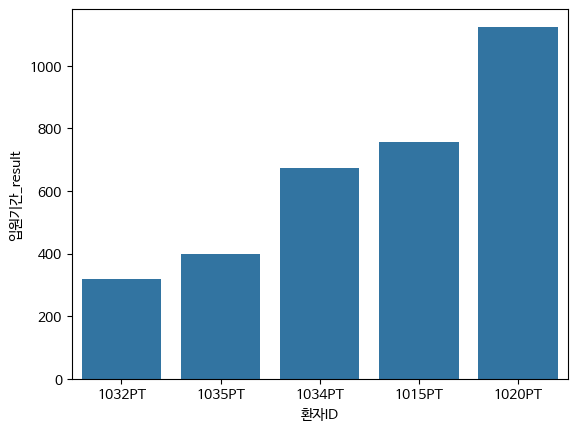

In [248]:
sns.barplot(data=df_spinesurgery_sorted, y='입원기간_result', x='환자ID')

<Axes: xlabel='count', ylabel='입원기간_result'>

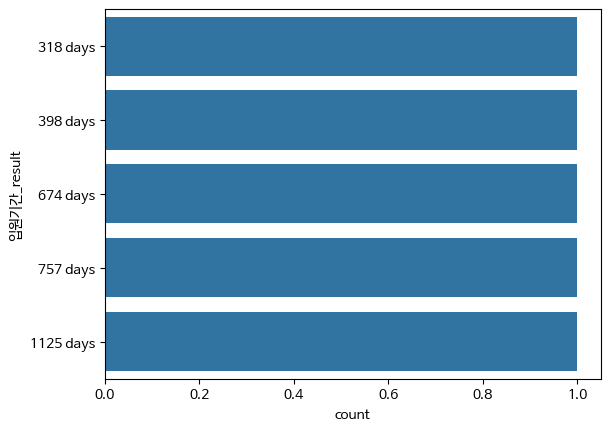

In [228]:
sns.countplot(data=df_spinesurgery_sorted, y='입원기간_result')

### 수술 일자

In [229]:
df_spinesurgery['수술일자'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1894 entries, 0 to 1893
Series name: 수술일자
Non-Null Count  Dtype
--------------  -----
1894 non-null   int64
dtypes: int64(1)
memory usage: 14.9 KB


In [230]:
df_spinesurgery['수술일자_datetime'] = pd.to_datetime(df_spinesurgery['수술일자'], format='%Y%m%d')

In [231]:
df_spinesurgery['수술일자'].value_counts()

20190131    28
20190103    20
20190228    18
20190201    14
20190102    13
            ..
20110124     1
20110509     1
20190428     1
20190314     1
20170412     1
Name: 수술일자, Length: 976, dtype: int64

In [232]:
df_spinesurgery['수술일자_datetime_year'] = df_spinesurgery['수술일자_datetime'].dt.year
df_spinesurgery['수술일자_datetime_month'] = df_spinesurgery['수술일자_datetime'].dt.month
df_spinesurgery['수술일자_datetime_day'] = df_spinesurgery['수술일자_datetime'].dt.day
df_spinesurgery[['수술일자', '수술일자_datetime_year', '수술일자_datetime_month', '수술일자_datetime_day']][:5]

,수술일자,수술일자_datetime_year,수술일자_datetime_month,수술일자_datetime_day
0,20190715,2019,7,15
1,20190716,2019,7,16
2,20190731,2019,7,31
3,20190802,2019,8,2
4,20190906,2019,9,6


#### year

In [233]:
df_spinesurgery['수술일자_datetime_year'].unique()

array([2019, 2020, 2017, 2009, 2011, 2013, 2012, 2014, 2016, 2010, 2015,
       2018])

In [234]:
df_spinesurgery['수술일자_datetime_year'].value_counts().iloc[:5]

2019    771
2011    202
2020    182
2012    150
2009    101
Name: 수술일자_datetime_year, dtype: int64

In [235]:
df_spinesurgery_year = df_spinesurgery['수술일자_datetime_year'].value_counts()

<Axes: ylabel='수술일자_datetime_year'>

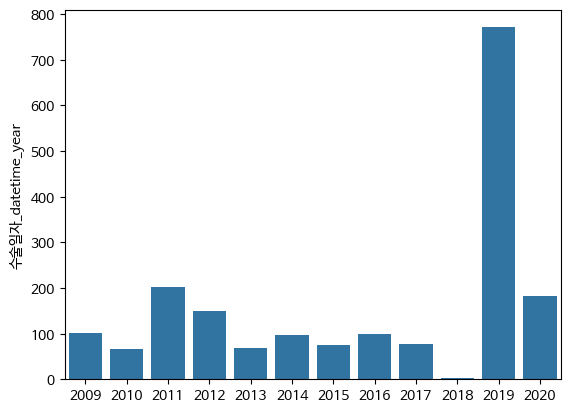

In [236]:
sns.barplot(data=df_spinesurgery_year)

#### month

In [237]:
df_spinesurgery['수술일자_datetime_month'].unique()

array([ 7,  8,  9,  6,  4, 12,  2, 11,  1,  3, 10,  5])

In [238]:
df_spinesurgery['수술일자_datetime_month'].value_counts().iloc[:5]

1     285
2     201
3     192
12    177
10    173
Name: 수술일자_datetime_month, dtype: int64

In [239]:
df_spinesurgery_month = df_spinesurgery['수술일자_datetime_month'].value_counts()

<Axes: ylabel='수술일자_datetime_month'>

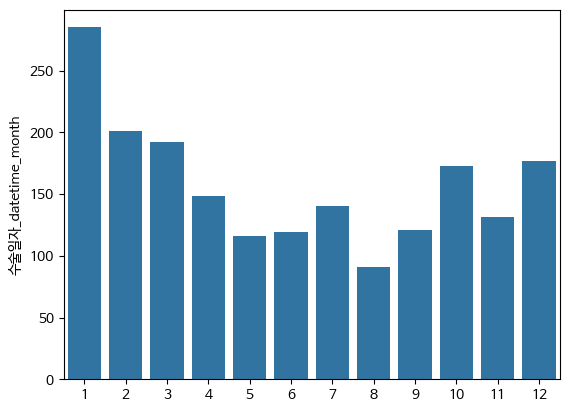

In [240]:
sns.barplot(data=df_spinesurgery_month)

#### day

In [241]:
df_spinesurgery['수술일자_datetime_day'].unique()

array([15, 16, 31,  2,  6,  7, 25, 13, 19,  9, 21, 22, 20, 27,  8, 28,  3,
       18,  4, 10,  1, 12, 26, 30,  5, 23, 11, 29, 24, 17, 14])

In [242]:
df_spinesurgery['수술일자_datetime_day'].value_counts().iloc[:5]

28    88
3     82
1     78
31    77
2     74
Name: 수술일자_datetime_day, dtype: int64

In [243]:
df_spinesurgery_day = df_spinesurgery['수술일자_datetime_day'].value_counts()

<Axes: ylabel='수술일자_datetime_day'>

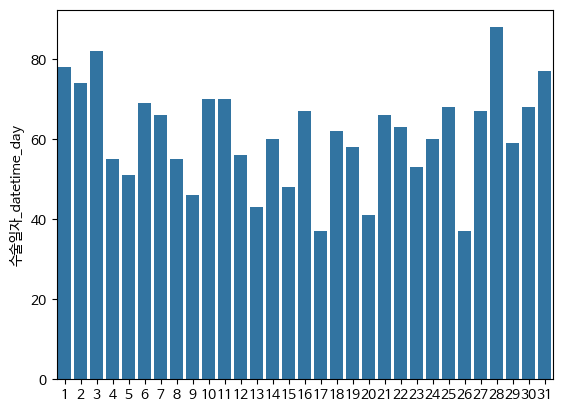

In [244]:
sns.barplot(data=df_spinesurgery_day)